In [1]:
from skimage import filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1200, 1200)


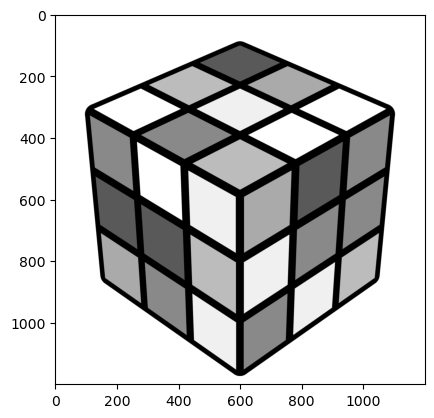

In [2]:
img = cv2.imread('./image/cube.png',0)
print(img.shape)
plt.imshow(img, cmap='grey')
plt.show()

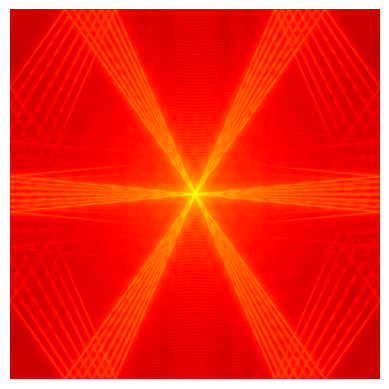

In [4]:
# transform image into freq. domain and shifted
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='hot')
plt.axis('off')
plt.show()

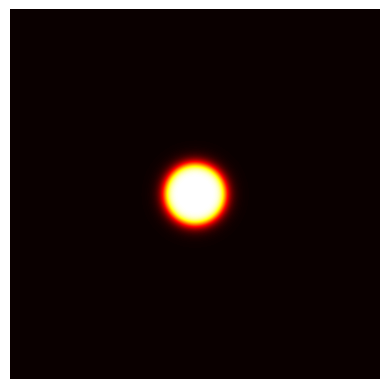

In [6]:
# Butterwort Low Pass Filter
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 100 # cut of frequency
n = 10 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='hot')
plt.axis('off')
plt.show()

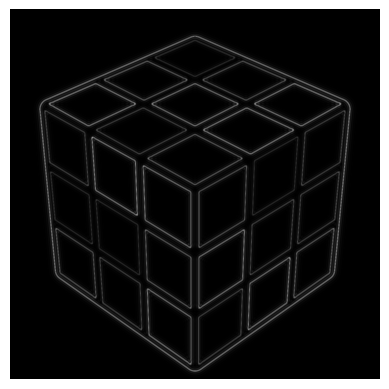

In [17]:
# frequency domain image filters
HPF = 1 -  H
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

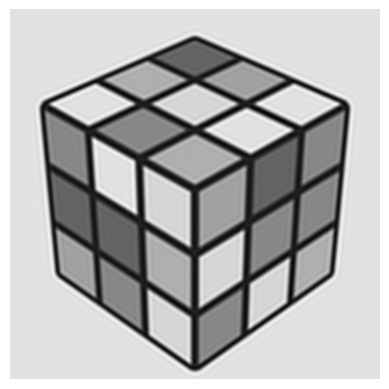

In [15]:
plt.imshow(filters.butterworth(img,cutoff_frequency_ratio=.05, order=5, high_pass=False),cmap='grey')
plt.axis(False)
plt.show()